In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
%matplotlib inline

In [204]:
df = pd.read_csv('programas/data/UCI_Credit_Card.csv')

In [205]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [206]:
df.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [207]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [208]:
df.shape

(30000, 25)

In [209]:
rawc = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
rawd = ['SEX','EDUCATION','MARRIAGE','default.payment.next.month','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [210]:
def freq(df,var):
    for v in var:
        aux = df[v].value_counts().sort_index().to_frame()
        aux.rename(columns={v:'fa'},inplace=True)
        aux['fr'] = aux['fa']/aux['fa'].sum()
        aux['faa'] = aux['fa'].cumsum()
        aux['fra'] = aux['fr'].cumsum()
        print('****%s****\n'%v)
        print(aux)
        print('\n')

In [211]:
freq(df,rawd)

****SEX****

      fa        fr    faa       fra
1  11888  0.396267  11888  0.396267
2  18112  0.603733  30000  1.000000


****EDUCATION****

      fa        fr    faa       fra
0     14  0.000467     14  0.000467
1  10585  0.352833  10599  0.353300
2  14030  0.467667  24629  0.820967
3   4917  0.163900  29546  0.984867
4    123  0.004100  29669  0.988967
5    280  0.009333  29949  0.998300
6     51  0.001700  30000  1.000000


****MARRIAGE****

      fa        fr    faa       fra
0     54  0.001800     54  0.001800
1  13659  0.455300  13713  0.457100
2  15964  0.532133  29677  0.989233
3    323  0.010767  30000  1.000000


****default.payment.next.month****

      fa      fr    faa     fra
0  23364  0.7788  23364  0.7788
1   6636  0.2212  30000  1.0000


****PAY_1****

       fa        fr    faa       fra
-2   2759  0.091967   2759  0.091967
-1   5686  0.189533   8445  0.281500
 0  14737  0.491233  23182  0.772733
 1   3688  0.122933  26870  0.895667
 2   2667  0.088900  29537  0.9845

In [212]:
df[rawc].describe(percentiles=[0.01,0.05,0.95,0.99])

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
1%,10000.000000,22.000000,-81.000000,-200.000000,-2.000000e+02,-212.020000,-232.010000,-331.030000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
5%,20000.000000,23.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
95%,430000.000000,53.000000,201203.050000,194792.200000,1.878210e+05,174333.350000,165794.300000,161912.000000,18428.200000,1.900435e+04,17589.40000,16014.950000,16000.000000,17343.800000
99%,500000.000000,60.000000,350110.680000,337495.280000,3.250304e+05,304997.270000,285868.330000,279505.060000,66522.180000,7.665102e+04,70000.00000,67054.440000,65607.560000,82619.050000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [213]:
df = df.loc[(df['LIMIT_BAL']<=500000)&(df['AGE']<=60)]
for i in range(6):
    df = df.loc[(df['BILL_AMT%d'%(i+1)]>=-300)&(df['BILL_AMT%d'%(i+1)]<=350000)]
    df = df.loc[(df['PAY_AMT%d'%(i+1)]<=90000)]
df.reset_index(drop=True,inplace=True)

In [214]:
df.shape[0]/30000

0.9167

In [215]:
df[rawc].describe(percentiles=[0.01,0.05,0.95,0.99])

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000,27501.000000
mean,156639.019672,35.134722,46516.091088,44425.809061,42004.515654,38560.327188,35821.700847,34479.611614,4320.229846,4183.652049,3810.996982,3569.413258,3523.447038,3507.715392
std,120031.303810,8.858655,60804.006998,58578.469777,56154.935158,52633.559079,49858.690762,49000.244179,7707.628152,7527.159478,7459.319503,7498.522024,7342.645326,7621.588538
min,10000.000000,21.000000,-300.000000,-295.000000,-295.000000,-300.000000,-300.000000,-300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,10000.000000,22.000000,-5.000000,-7.000000,-5.000000,-5.000000,-4.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,20000.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,130000.000000,34.000000,21996.000000,20787.000000,19748.000000,18768.000000,17831.000000,16625.000000,2027.000000,2000.000000,1700.000000,1457.000000,1480.000000,1365.000000
95%,400000.000000,52.000000,181532.000000,174479.000000,167008.000000,153833.000000,144339.000000,141493.000000,14877.000000,14838.000000,13983.000000,12900.000000,12600.000000,12576.000000
99%,500000.000000,57.000000,276681.000000,266163.000000,256428.000000,242803.000000,227775.000000,223545.000000,42000.000000,40146.000000,40600.000000,41803.000000,40000.000000,42000.000000
max,500000.000000,60.000000,349125.000000,345620.000000,348485.000000,347813.000000,345904.000000,348032.000000,90000.000000,90000.000000,90000.000000,89437.000000,90000.000000,90000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37a30e72b0>,
      dtype=object)

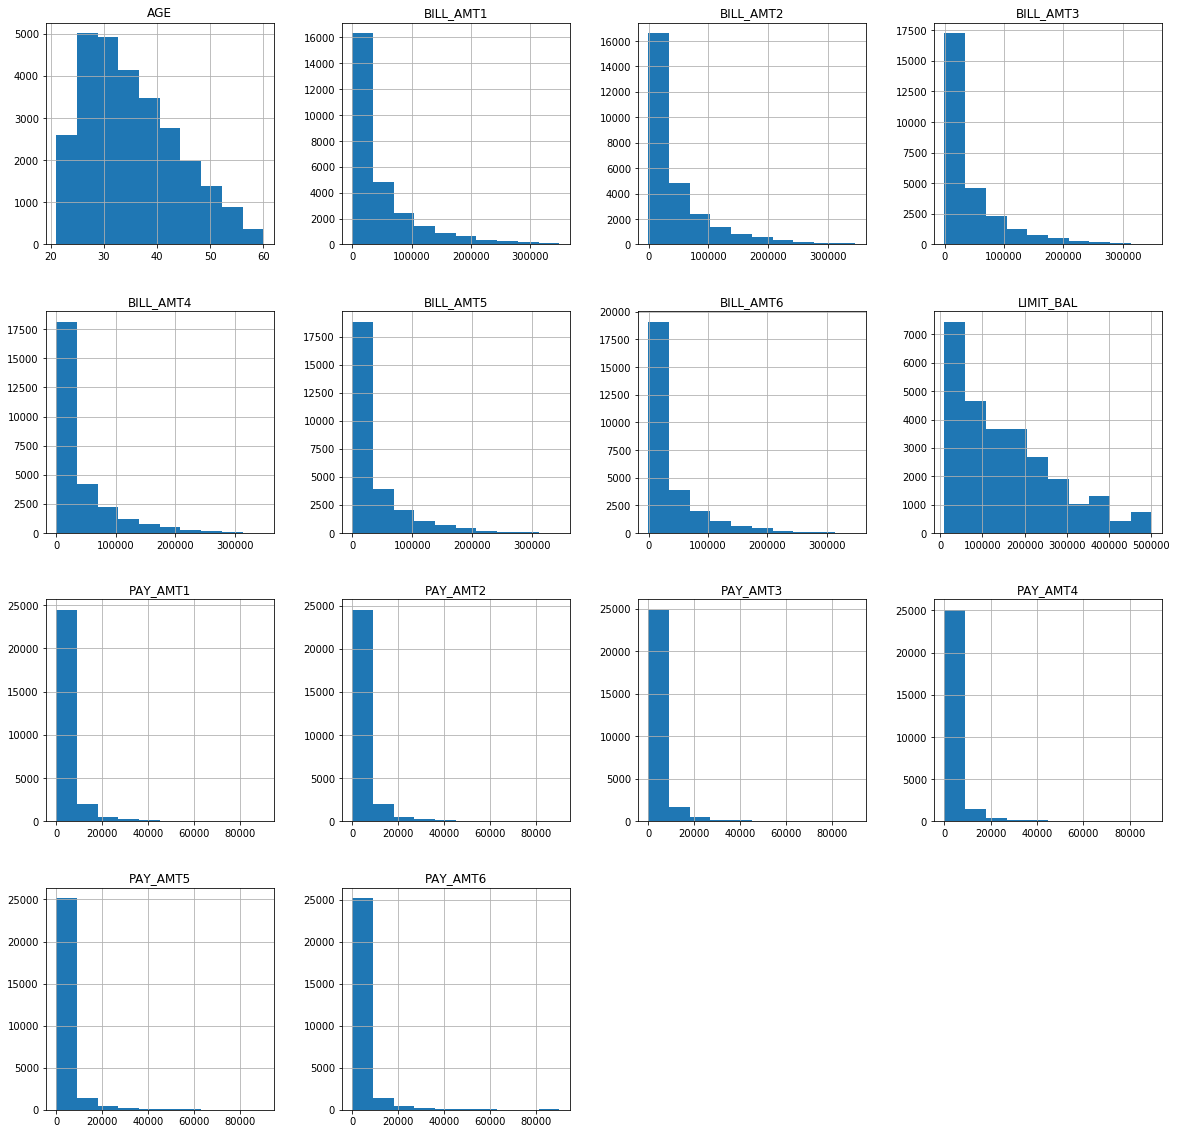

In [216]:
df[rawc].hist(figsize=(20,20))

In [217]:
for i in range(6):
    df['USE%d'%(i+1)] = df['BILL_AMT%d'%(i+1)]/df['LIMIT_BAL']

In [218]:
for k in range(3,9,3):
    df['v_max_mora_%d'%k] = df[['PAY_%d'%(i+1) for i in range(k)]].max(axis=1)
    df['v_mean_utilization_%d'%k] = df[['USE%d'%(i+1) for i in range(k)]].mean(axis=1)
    df['v_mean_bill_%d'%k] = df[['BILL_AMT%d'%(i+1) for i in range(k)]].mean(axis=1)
    
    if k==6:
        df['v_mean_amort_%d'%k] = df[['PAY_AMT%d'%(i+1) for i in range(k-1)]].sum(axis=1)/df[['BILL_AMT%d'%(i+2) for i in range(k-1)]].sum(axis=1)
    else:
        df['v_mean_amort_%d'%k] = df[['PAY_AMT%d'%(i+1) for i in range(k)]].sum(axis=1)/df[['BILL_AMT%d'%(i+2) for i in range(k)]].sum(axis=1)
    df['v_n_times_current_%d'%k] = 0
    for i in range(k):
        df['v_n_times_current_%d'%k]+=(df['PAY_%d'%(i+1)]<=0).astype(int)

In [219]:
df.rename(columns={'AGE':'v_age','default.payment.next.month':'target','LIMIT_BAL':'v_limit'},inplace=True)

In [220]:
df.head()

,ID,v_limit,SEX,EDUCATION,MARRIAGE,v_age,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target,USE1,USE2,USE3,USE4,USE5,USE6,v_max_mora_3,v_mean_utilization_3,v_mean_bill_3,v_mean_amort_3,v_n_times_current_3,v_max_mora_6,v_mean_utilization_6,v_mean_bill_6,v_mean_amort_6,v_n_times_current_6
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,2,0.128400,2568.000000,0.181746,1,2,0.064200,1284.000000,0.181746,4
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,2,0.019692,2363.000000,0.260451,2,2,0.023718,2846.166667,0.208406,4
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,0,0.210463,18941.666667,0.095856,3,0,0.188246,16942.166667,0.083105,6
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,0,0.963427,48171.333333,0.041474,3,0,0.771113,38555.666667,0.040077,6
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,0,0.334147,16707.333333,0.779582,3,0,0.364463,18223.166667,0.579516,6


In [221]:
df = df[['ID','target']+[v for v in df.columns if v[:2]=='v_']]

In [222]:
df.shape

(27501, 14)

In [223]:
#TAD (tabla analítica de datos)

$S_n=\lbrace(x^{(i)},y^{(i)}),i=1,\ldots,n\rbrace$

In [224]:
df.head()

,ID,target,v_limit,v_age,v_max_mora_3,v_mean_utilization_3,v_mean_bill_3,v_mean_amort_3,v_n_times_current_3,v_max_mora_6,v_mean_utilization_6,v_mean_bill_6,v_mean_amort_6,v_n_times_current_6
0,1,1,20000.0,24,2,0.128400,2568.000000,0.181746,1,2,0.064200,1284.000000,0.181746,4
1,2,1,120000.0,26,2,0.019692,2363.000000,0.260451,2,2,0.023718,2846.166667,0.208406,4
2,3,0,90000.0,34,0,0.210463,18941.666667,0.095856,3,0,0.188246,16942.166667,0.083105,6
3,4,0,50000.0,37,0,0.963427,48171.333333,0.041474,3,0,0.771113,38555.666667,0.040077,6
4,5,0,50000.0,57,0,0.334147,16707.333333,0.779582,3,0,0.364463,18223.166667,0.579516,6


## Análisis Exploratorio

In [225]:
varc = [v for v in df.columns if v[:2]=='v_']

#### Missings

In [226]:
for k in range(3,9,3):
    df['v_mean_amort_%d'%k].replace({np.inf:np.nan},inplace=True)

In [229]:
(1-df[varc].describe().T[['count']]/len(df)).sort_values('count',ascending=False)

,count
v_mean_amort_3,0.056580
v_mean_amort_6,0.044653
v_limit,0.000000
v_age,0.000000
v_max_mora_3,0.000000
v_mean_utilization_3,0.000000
v_mean_bill_3,0.000000
v_n_times_current_3,0.000000
v_max_mora_6,0.000000
v_mean_utilization_6,0.000000


In [230]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape

(25945, 14)

In [231]:
df.shape[0]/27501

0.9434202392640267

#### Valores extremos

In [232]:
df[varc].describe(percentiles=[0.01,0.05,0.95,0.99])

,v_limit,v_age,v_max_mora_3,v_mean_utilization_3,v_mean_bill_3,v_mean_amort_3,v_n_times_current_3,v_max_mora_6,v_mean_utilization_6,v_mean_bill_6,v_mean_amort_6,v_n_times_current_6
count,25945.000000,25945.000000,25945.000000,25945.000000,25945.000000,25945.000000,25945.000000,25945.000000,25945.000000,25945.000000,25945.000000,25945.000000
mean,154216.214299,35.081711,0.302949,0.436790,46850.025079,-0.541198,2.466448,0.501368,0.398084,42638.289613,0.357215,5.110811
std,119766.686514,8.879176,1.293333,0.388943,58307.440063,172.236663,0.983777,1.347846,0.352009,53258.324450,2.697835,1.627608
min,10000.000000,21.000000,-2.000000,-0.005800,-295.000000,-27383.333333,0.000000,-2.000000,-0.002667,-286.000000,-176.000000,0.000000
1%,10000.000000,22.000000,-2.000000,0.000073,14.493333,0.000000,0.000000,-2.000000,0.000915,175.000000,0.000000,0.000000
5%,20000.000000,23.000000,-2.000000,0.002750,434.666667,0.029780,0.000000,-2.000000,0.003511,591.600000,0.033523,0.000000
50%,130000.000000,34.000000,0.000000,0.372285,24567.000000,0.086230,3.000000,0.000000,0.341158,22490.000000,0.088151,6.000000
95%,400000.000000,52.000000,2.000000,1.000587,176264.400000,1.006131,3.000000,2.000000,0.966799,160103.000000,1.005621,6.000000
99%,500000.000000,57.000000,4.000000,1.162473,265836.266667,1.217869,3.000000,4.000000,1.048667,244448.146667,1.183088,6.000000
max,500000.000000,60.000000,8.000000,6.075733,345838.333333,4444.333333,3.000000,8.000000,5.364308,343295.333333,383.116279,6.000000


In [237]:
df = df.loc[(df.v_mean_utilization_3>=0)&((df.v_mean_utilization_3<=1.2))]
df = df.loc[(df.v_mean_utilization_6>=0)&((df.v_mean_utilization_6<=1.2))]
df = df.loc[(df.v_mean_amort_3>=0)&((df.v_mean_amort_3<=1.25))]
df = df.loc[(df.v_mean_amort_6>=0)&((df.v_mean_amort_6<=1.25))]
df['v_max_mora_3'] = np.where(df['v_max_mora_3']<0,0,df['v_max_mora_3']) 
df['v_max_mora_6'] = np.where(df['v_max_mora_6']<0,0,df['v_max_mora_6']) 
df = df.loc[(df.v_max_mora_3>=0)&((df.v_max_mora_3<=4))]
df = df.loc[(df.v_max_mora_6>=0)&((df.v_max_mora_6<=4))]

In [238]:
df.shape[0]/25945

0.9687415687030256

In [242]:
df.reset_index(drop=True,inplace=True)

In [240]:
df[varc].describe(percentiles=[0.01,0.05,0.95,0.99])

,v_limit,v_age,v_max_mora_3,v_mean_utilization_3,v_mean_bill_3,v_mean_amort_3,v_n_times_current_3,v_max_mora_6,v_mean_utilization_6,v_mean_bill_6,v_mean_amort_6,v_n_times_current_6
count,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,154893.915811,35.060277,0.546113,0.433360,47235.671507,0.342300,2.480107,0.679717,0.396182,43064.005331,0.334038,5.136429
std,119812.742083,8.872626,0.938529,0.371971,58208.060581,0.398798,0.971515,1.012431,0.340937,53296.627739,0.386583,1.594229
min,10000.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000036,8.833333,0.000000,0.000000
1%,10000.000000,22.000000,0.000000,0.000658,133.333333,0.008736,0.000000,0.000000,0.001161,244.220000,0.022765,0.000000
5%,20000.000000,23.000000,0.000000,0.003227,520.000000,0.032095,0.000000,0.000000,0.004001,675.433333,0.034549,1.000000
50%,130000.000000,34.000000,0.000000,0.377727,25188.833333,0.087064,3.000000,0.000000,0.345932,22940.500000,0.088106,6.000000
95%,400000.000000,52.000000,2.000000,0.994968,176007.800000,1.004911,3.000000,2.000000,0.957070,160710.383333,1.004171,6.000000
99%,500000.000000,57.000000,3.000000,1.051663,264682.136667,1.056083,3.000000,3.000000,1.012798,244521.901667,1.048774,6.000000
max,500000.000000,60.000000,4.000000,1.199059,345838.333333,1.250000,3.000000,4.000000,1.198833,343295.333333,1.246576,6.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37a2a3e5f8>,
      dtype=object)

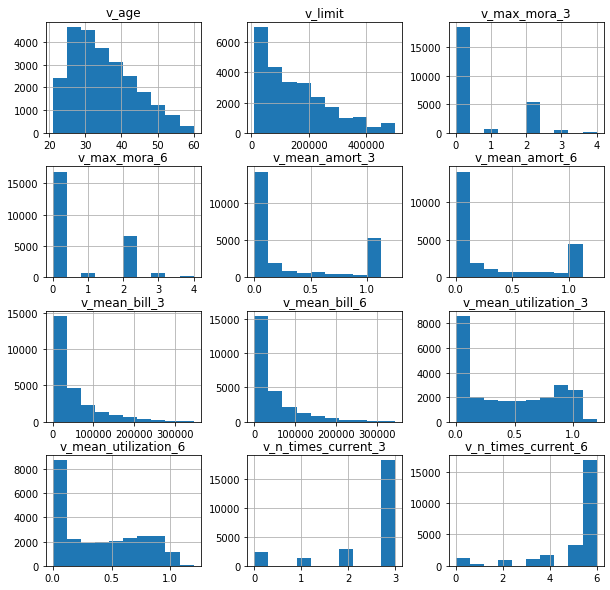

In [241]:
df[varc].hist(figsize=(10,10))

In [277]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,TSNE

In [254]:
X = df[varc].copy()
y = df['target']

In [255]:
sc = StandardScaler()
Xs = pd.DataFrame(sc.fit_transform(X),columns=varc)

In [278]:
sc = MinMaxScaler()
Xm = pd.DataFrame(sc.fit_transform(X),columns=varc)

In [257]:
pca =PCA(n_components=2)

In [258]:
pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [259]:
pca.explained_variance_ratio_.cumsum()

array([0.4090144, 0.679022 ])

In [260]:
Xp = pd.DataFrame(pca.transform(X),columns=['d1','d2'])

In [261]:
Xp['y'] = y

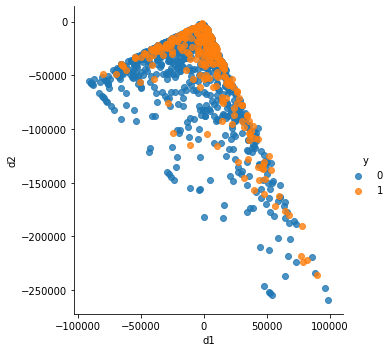

In [264]:
sns.lmplot(data=Xp.sample(frac=0.05),x='d1',y='d2',fit_reg=False,hue='y')

In [265]:
ts = TSNE(n_components=2,n_jobs=-1)

In [266]:
Xt = pd.DataFrame(ts.fit_transform(Xs),columns=['d1','d2'])
Xt['y'] = y

KeyboardInterrupt: 

In [ ]:
sns.lmplot(data=Xt.sample(frac=0.05),x='d1',y='d2',fit_reg=False,hue='y')

In [267]:
from sklearn.linear_model import Perceptron,PassiveAggressiveClassifier
from sklearn.svm import SVC

In [273]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [297]:
m_pe = Perceptron(max_iter=1000000)
m_pa = PassiveAggressiveClassifier()
m_sv = SVC(kernel='rbf')

In [285]:
def hyper(modelo,d,X,y):
    grid = GridSearchCV(verbose=True,param_grid=d,cv=3,estimator=modelo,n_jobs=-1,scoring='accuracy')
    grid.fit(X,y)
    return grid.best_score_,grid.best_estimator_,grid.best_params_

In [279]:
Xt, Xv, yt, yv = train_test_split (Xm,y)

In [283]:
m_pe.fit(Xt,yt)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000000, n_iter_no_change=5,
           n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [284]:
print(accuracy_score(y_pred = m_pe.predict(Xt),y_true=yt))
print(accuracy_score(y_pred = m_pe.predict(Xv),y_true=yv))

0.6159681697612732
0.6163271801400382


In [288]:
score, m_pa, d = hyper(m_pa,dict(C=np.arange(0,2,0.01)),Xt,yt)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    8.5s finished


In [289]:
score,d

(0.808912620548735, {'C': 0.17})

In [290]:
m_pa.fit(Xt,yt)

PassiveAggressiveClassifier(C=0.17, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [291]:
print(accuracy_score(y_pred = m_pa.predict(Xt),y_true=yt))
print(accuracy_score(y_pred = m_pa.predict(Xv),y_true=yv))

0.8020159151193634
0.797422024188415


In [298]:
score, m_sv, d = hyper(m_sv,dict(C=np.arange(0,1,0.1)),Xt,yt)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  1.2min remaining:   22.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


In [299]:
score,d

(0.80976132842272, {'C': 0.30000000000000004})

In [300]:
m_sv.fit(Xt,yt)

SVC(C=0.30000000000000004, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [301]:
print(accuracy_score(y_pred = m_sv.predict(Xt),y_true=yt))
print(accuracy_score(y_pred = m_sv.predict(Xv),y_true=yv))

0.810185676392573
0.8042647994907702
